# Analisando dados do bikeshare em Washinghton D.C.
Utilizando as bibliotecas **pandas** e **matplotlib** faremos uma análise estatística sobre os dados do bikeshare de Washington D.C, disponível <a href='https://www.kaggle.com/marklvl/bike-sharing-dataset'>neste link</a> para avaliação na matéria de Matemática IV, ministrada pelo professor <a href='http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4201222H6'>João César Valim</a>.

### Importando bibliotecas e lendo dados

In [57]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

Olhando os tipos de dados no conjunto.

In [3]:
day.infer_objects().dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## O clima afeta o uso?
Vamos fazer uma visualização de dados comparando o número de bibicletas alugadas e a sensação térmica.

### Gráfico de dispersão da Sensação Térmica

A sensação térmica é dada segundo uma fórmula fornecida pela empresa responsável do bikeshare:
*(t-t_min)/(t_max-t_min), t_min=-16, t_max=+50*,
quanto mais próximo de 1, mais quente.

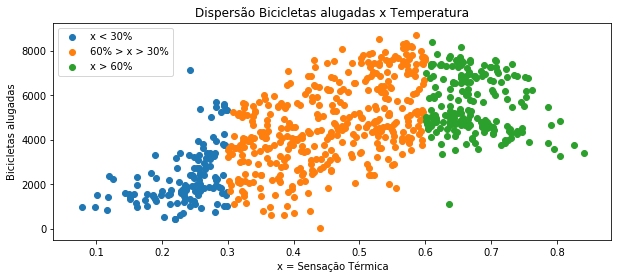

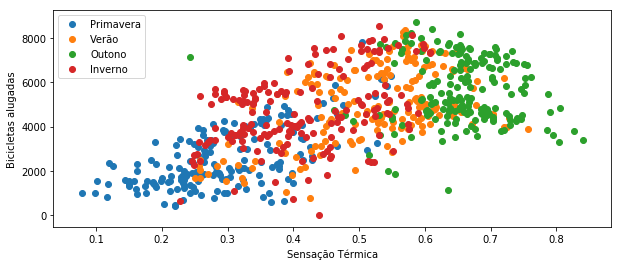

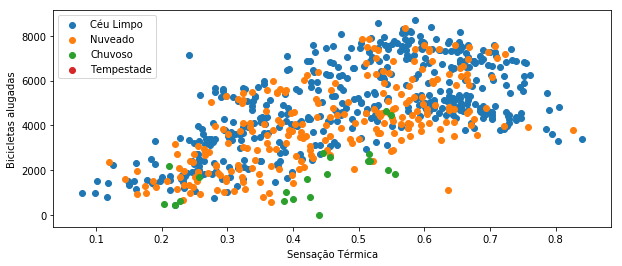

In [131]:
plt.figure(figsize=(10,4))

plt.scatter(day[day['atemp']<0.3]['atemp'], day[day['atemp']<0.3]['cnt'],label='x < 30%')
plt.scatter(day[day['atemp']>=0.3][day['atemp']<0.6]['atemp'], day[day['atemp']>=0.3][day['atemp']<0.6]['cnt'], label='60% > x > 30%')
plt.scatter(day[day['atemp']>=0.6]['atemp'], day[day['atemp']>=0.6]['cnt'],label='x > 60%')
plt.legend()
plt.ylabel('Bicicletas alugadas')
plt.xlabel('x = Sensação Térmica')
plt.title('Dispersão Bicicletas alugadas x Temperatura')
plt.show()

plt.figure(figsize=(10,4))
plt.scatter(day[day['season']==1]['atemp'], day[day['season']==1]['cnt'],label='Primavera')
plt.scatter(day[day['season']==2]['atemp'], day[day['season']==2]['cnt'], label='Verão')
plt.scatter(day[day['season']==3]['atemp'], day[day['season']==3]['cnt'], label='Outono')
plt.scatter(day[day['season']==4]['atemp'], day[day['season']==4]['cnt'], label='Inverno')
plt.ylabel('Bicicletas alugadas')
plt.xlabel('Sensação Térmica')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.scatter(day[day['weathersit']==1]['atemp'], day[day['weathersit']==1]['cnt'],label='Céu Limpo')
plt.scatter(day[day['weathersit']==2]['atemp'], day[day['weathersit']==2]['cnt'], label='Nuveado')
plt.scatter(day[day['weathersit']==3]['atemp'], day[day['weathersit']==3]['cnt'], label='Chuvoso')
plt.scatter(day[day['weathersit']==4]['atemp'], day[day['weathersit']==4]['cnt'], label='Tempestade')
plt.ylabel('Bicicletas alugadas')
plt.xlabel('Sensação Térmica')
plt.legend()
plt.show()


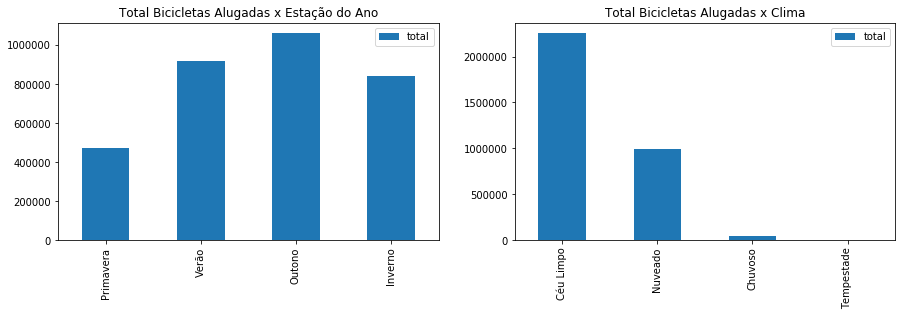

In [235]:

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(15)
season = {'Primavera':(day[day['season']==1])['cnt'].sum(),
         'Verão':(day[day['season']==2])['cnt'].sum(),
         'Outono':(day[day['season']==3])['cnt'].sum(),
         'Inverno':(day[day['season']==4])['cnt'].sum(),
        }
season = pd.DataFrame.from_dict(season,orient='index')
season.columns=['total']

season.plot(kind='bar', ax=axes[0], title='Total Bicicletas Alugadas x Estação do Ano')


weather = {'Céu Limpo':(day[day['weathersit']==1])['cnt'].sum(),
         'Nuveado':(day[day['weathersit']==2])['cnt'].sum(),
         'Chuvoso':(day[day['weathersit']==3])['cnt'].sum(),
         'Tempestade':(day[day['weathersit']==4])['cnt'].sum(),
        }
weather = pd.DataFrame.from_dict(weather,orient='index')
weather.columns=['total']
weather.plot(kind='bar', ax=axes[1], title = 'Total Bicicletas Alugadas x Clima')

plt.legend()
plt.show()


### Box Plot das Sensações térmicas x bicicletas alugadas

Observamos uma boa diferença quanto a sensação térmica e o aluguel de bikes. Os círculos que aparecem nos gráficos são valores *outliers*. Num boxplot, o primeiro traço é o valror mínimo, o lado inferior (quanto ao eixo y) do quadrado é o primeiro quartil, o traço no meio do quadrado é segundo quartil (mediana), e lado superior do quadrado o terceiro quartil, e traço superior o valor máximo.

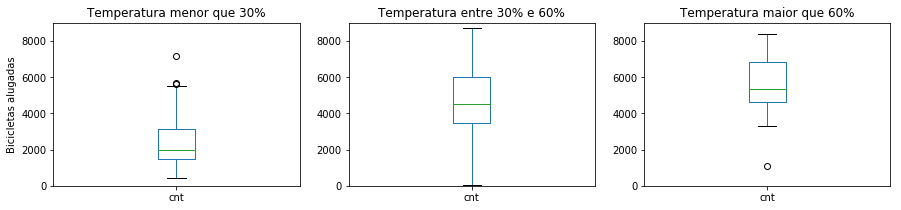

In [290]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
day[day['atemp']<0.3]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Temperatura menor que 30%')
plt.ylabel('Bicicletas alugadas')

plt.subplot(1,3,2)
day[day['atemp']>=0.3][day['atemp']<0.6]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Temperatura entre 30% e 60%')

plt.subplot(1,3,3)
day[day['atemp']>=0.6]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Temperatura maior que 60%')

plt.show()

### Gráfico de dispersão Humidade

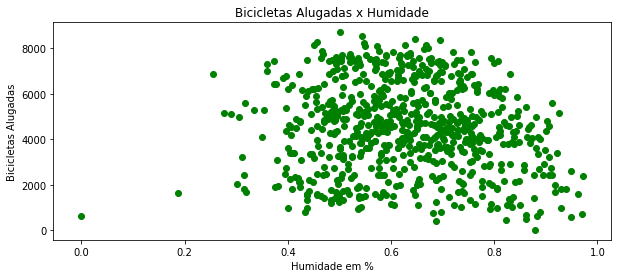

In [306]:
plt.figure(figsize=(10,4))
plt.ylabel('Bicicletas Alugadas')
plt.xlabel('Humidade em %')
plt.scatter(day['hum'], day['cnt'],c='green')
plt.title('Bicicletas Alugadas x Humidade')
plt.show()

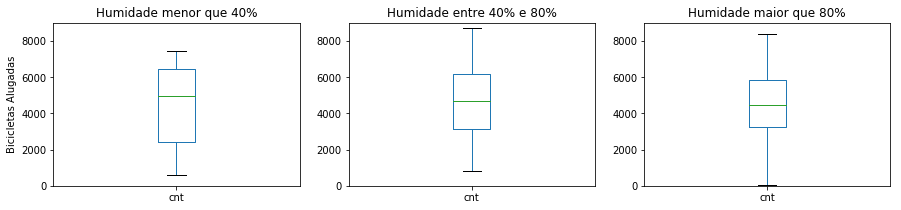

In [294]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
day[day['hum']<0.4]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Humidade menor que 40%')
plt.ylabel('Bicicletas Alugadas')

plt.subplot(1,3,2)
day[day['hum']>=0.3][day['hum']<0.6]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Humidade entre 40% e 80%')

plt.subplot(1,3,3)
day[day['hum']>=0.6]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Humidade maior que 80%')

plt.show()

### Gráfico de dispersão Velocidade do Vento

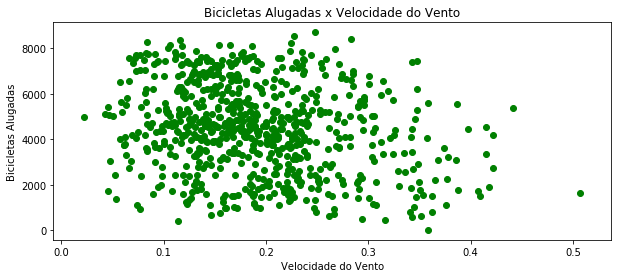

In [304]:
plt.figure(figsize=(10,4))
plt.ylabel('Bicicletas Alugadas')
plt.xlabel('Velocidade do Vento')
plt.scatter(day['windspeed'], day['cnt'],c='green')
plt.title('Bicicletas Alugadas x Velocidade do Vento')
plt.show()

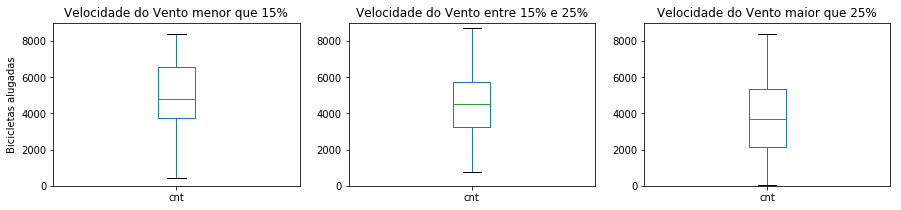

In [297]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
day[day['windspeed']<0.15]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Velocidade do Vento menor que 15%')
plt.ylabel('Bicicletas alugadas')

plt.subplot(1,3,2)
day[day['windspeed']>=0.15][day['windspeed']<0.25]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Velocidade do Vento entre 15% e 25%')

plt.subplot(1,3,3)
day[day['windspeed']>=0.25]['cnt'].plot(kind='box', ylim=(0,9000))
plt.title('Velocidade do Vento maior que 25%')

plt.show()

Olhando os *boxplots* da velocidade do vento e humidade, vemos uma menor relação com o alugel de bicicletas.

## Como os dias da influenciam?

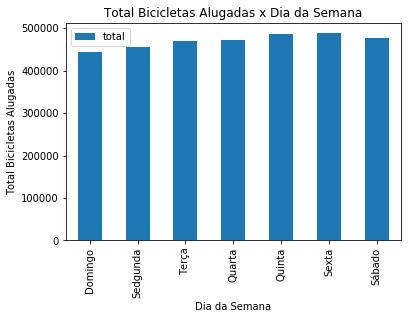

In [236]:
dWeek = {'Domingo':(day[day['weekday']==0])['cnt'].sum(),
         'Sedgunda':(day[day['weekday']==1])['cnt'].sum(),
         'Terça':(day[day['weekday']==2])['cnt'].sum(),
         'Quarta':(day[day['weekday']==3])['cnt'].sum(),
         'Quinta':(day[day['weekday']==4])['cnt'].sum(),
         'Sexta':(day[day['weekday']==5])['cnt'].sum(),
         'Sábado':(day[day['weekday']==6]['cnt'].sum())
        }
dWeek = pd.DataFrame.from_dict(dWeek,orient='index')
dWeek.columns=['total']

dWeek.plot(kind='bar', title='Total Bicicletas Alugadas x Dia da Semana')
plt.ylabel('Total Bicicletas Alugadas')
plt.xlabel('Dia da Semana')
plt.show()


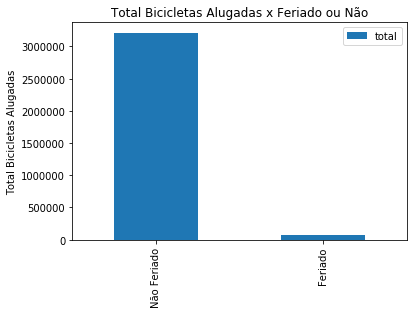

In [238]:
holiday = {'Não Feriado':(day[day['holiday']==0])['cnt'].sum(),
         'Feriado':(day[day['holiday']==1])['cnt'].sum(),
        }
holiday = pd.DataFrame.from_dict(holiday,orient='index')
holiday.columns=['total']

holiday.plot(kind='bar', title='Total Bicicletas Alugadas x Feriado ou Não')
plt.ylabel('Total Bicicletas Alugadas')
plt.show()

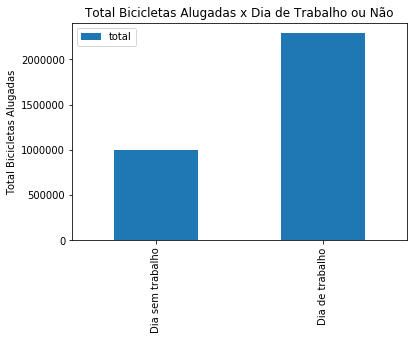

In [275]:
workingDay = {'Dia sem trabalho':(day[day['workingday']==0])['cnt'].sum(),
         'Dia de trabalho':(day[day['workingday']==1])['cnt'].sum(),
        }
workingDay = pd.DataFrame.from_dict(workingDay,orient='index')
workingDay.columns=['total']

workingDay.plot(kind='bar',title='Total Bicicletas Alugadas x Dia de Trabalho ou Não')
plt.ylabel('Total Bicicletas Alugadas')
plt.show()

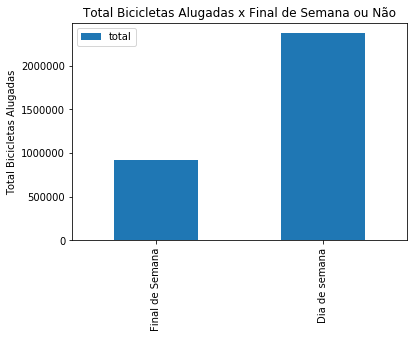

In [276]:
weeknd = {'Final de Semana':(day[day['weekday']<=0]['cnt'].sum() + day[day['weekday']>=6]['cnt'].sum()),
         'Dia de semana':(day[day['weekday']>0][day['weekday']<6])['cnt'].sum(),
        }
weeknd = pd.DataFrame.from_dict(weeknd,orient='index')
weeknd.columns=['total']

weeknd.plot(kind='bar', title='Total Bicicletas Alugadas x Final de Semana ou Não')
plt.ylabel('Total Bicicletas Alugadas')
plt.show()

{'Final de Semana': 4389.685714285714, 'Dia de semana': 4550.5662188099805}


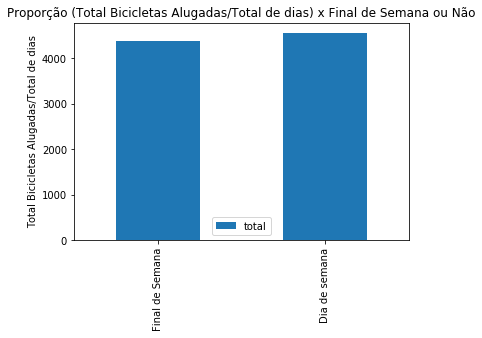

In [279]:
weeknd = {'Final de Semana':(day[day['weekday']==0].append(day[day['weekday']==6])['cnt'].sum())/
          (len(day[day['weekday']==0].append(day[day['weekday']==6]))),
         'Dia de semana':(day[day['weekday']>0][day['weekday']<6])['cnt'].sum()/
          (len(day[day['weekday']>0][day['weekday']<6])),
        }
print(weeknd)
weeknd = pd.DataFrame.from_dict(weeknd,orient='index')
weeknd.columns=['total']

weeknd.plot(kind='bar', title = 'Proporção (Total Bicicletas Alugadas/Total de dias) x Final de Semana ou Não')
plt.ylabel('Total Bicicletas Alugadas/Total de dias')
plt.show()

### Observando estatísticas

Abaixo vemos que a média de bicicletas alugadas em **finais de semana** é **4389.68 biciletas** e a mediana **4467.50**, mas com um alto desvio padrão (**2042.52 bicicletas**), já em dias de semana, a média é um pouco mais alta, com **4550.56** bicicletas e mediana de **3272**, e um desvio padrão menor (**1893.17** bicicletas), o que nos dá uma maior confiança de dizer que em dias de semana mais bicicletas são utilizadas.

In [280]:
day[day['weekday']==0].append(day[day['weekday']==6]).cnt.describe()

count     210.000000
mean     4389.685714
std      2042.527458
min       605.000000
25%      2765.250000
50%      4467.500000
75%      5871.500000
max      8714.000000
Name: cnt, dtype: float64

In [298]:
day[day['weekday']>0][day['weekday']<6].cnt.describe()

count     521.000000
mean     4550.566219
std      1893.171210
min        22.000000
25%      3272.000000
50%      4575.000000
75%      5992.000000
max      8362.000000
Name: cnt, dtype: float64

### Mais a fundo

O que acontece com essa estatística se excluirmos os dias com pouco movimento, que já observamos anteriormente? Vamos descobrir, excluindo os dias: tempestuosos/chuvosos e feriados.

In [299]:
new_data = day[day['weathersit']<3][day['holiday']==0]

In [300]:
new_data[new_data['weekday']==0].append(new_data[new_data['weekday']==6]).cnt.describe()

count     205.000000
mean     4452.473171
std      2014.408042
min       605.000000
25%      2918.000000
50%      4511.000000
75%      5923.000000
max      8714.000000
Name: cnt, dtype: float64

In [301]:
new_data[new_data['weekday']>0][new_data['weekday']<6].cnt.describe()

count     484.000000
mean     4676.896694
std      1826.811004
min       431.000000
25%      3543.500000
50%      4618.500000
75%      6138.000000
max      8362.000000
Name: cnt, dtype: float64

Observamos pouca alteração nos finais de semana, porém em dias de semana vemos um salto do **mínimo** de **22** para **431**, uma redução do desvio padrão (de **1893.17** para **1826.81**) e um aumento da média para **4676.89** e mediana para **4618.5**, um aumento de cerca 100 bicicletas em ambos, mostrando um impacto desses dias atípicos.